  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0 

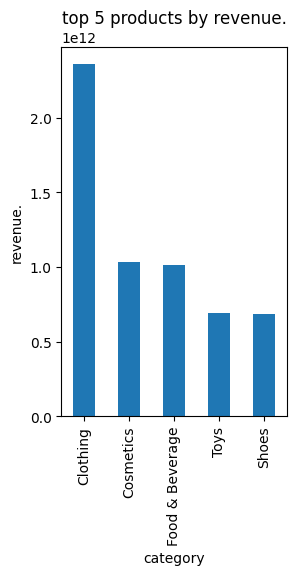

customer_id
C999995    68473374.42
C100004    68473374.42
C100005    68473374.42
C100006    68473374.42
C100012    68473374.42
Name: revenue, dtype: float64
gender
Female    4.068140e+12
Male      2.733868e+12
Name: revenue, dtype: float64


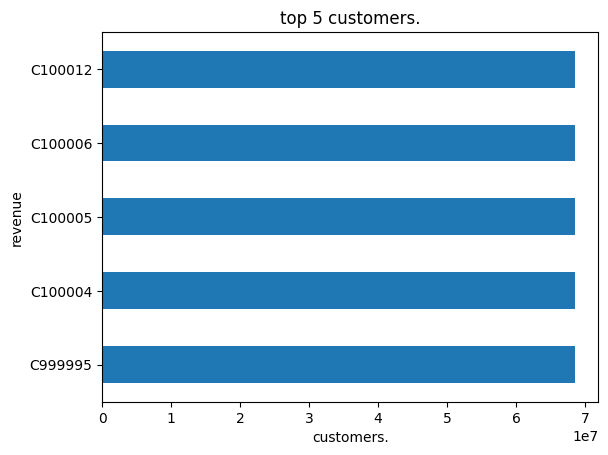

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
customers=pd.read_csv('customer_data.csv')
sales=pd.read_csv('sales_data.csv')
print(customers.head())
print(sales.head())
print(customers.info())
print(sales.info())
print(customers.isnull().sum())
print(sales.isna().sum())
customers.dropna(inplace=True)
print(customers.isnull().sum())
sales['quantity']=pd.to_numeric(sales['quantity'])
sales['price']=pd.to_numeric(sales['price'])
customers.drop_duplicates(inplace=True)
sales.drop_duplicates(inplace=True)
data=pd.merge(sales,customers,on='customer_id',how='inner')
print(data.head())
total_revenue=data['price'].sum()
data.rename(columns={'invoice_date':'order_date'},inplace=True)
#data['order_date']=data['order_date'].dt.strftime('%Y-%m-%d')
#data['order_date']=pd.to_datetime(data['order_date'])#data['month']=data['order_date'].dt.month
#total_orders=data[' customer_id  '].nunique()
print('total revenue:',total_revenue)
data['revenue']=data['price'].sum()
print(data)

#monthly_sales=data.groupby('month')[]
#monthly_sales=data.groupby('month')['revenue'].sum().reset_index()
#print(monthly_sales)
top_products=data.groupby('category')['revenue'].sum().sort_values(ascending=False).head(5)
print(top_products)
plt.subplot(1,2,1)
top_products.plot(kind='bar')
plt.title('top 5 products by revenue.')
plt.ylabel('revenue.')
plt.show()
top_customers=data.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(5)
print(top_customers)
city_sales=data.groupby('gender')['revenue'].sum().sort_values(ascending=False)
print(city_sales)

top_customers.plot(kind='barh')
plt.title('top 5 customers.')
plt.ylabel('revenue')
plt.xlabel('customers.')
plt.show()
data.to_csv('cleaned_sale_data.csv',index=False)

KEY INSIGHTS 1:


* a small number of customers generate most Revenue.

* Top category of products contribute the majority of sales.
* Only a small group of customers generates a large share of total revenue. Retaining these customers is critical for business growth.
* sales peak during the festive season, indicating strong seasonal demands. Marketing efforts should focus on these months.


INSIGHT 2:

Result:few products give most sales insight sentence:
> a limited number of products generate most of the revenue,indicating that these products are key drivers of business performance.


INSIGHT 3: Monthly Sales
Result: sales higher in some months
* insight sentence:
> Sales show clear seasonal trendas,with higher revenue trendas,with higher revenue in specific months,suggesting seasonal customer demand.


INSIGHT 4: Orders
Result: Many small orders or fewer big orders
Insight Sentence:
>Revenue growth is influenced more by repeat purchases than by one-line buyers.

INSIGHT 5:
> Repeat customers play a key role in maintaining steady revenue.